## End member mixing analysis (EMMA) to determine streamflow source contributions

### Conservative tracers are vital for a successful application of EMMA.​

#### Hooper (2003) suggested that assumptions of linearity of mixing and conservative behavior of tracers can be evaluated using bivariate scatter plots and residual derived from the selected model.

#### Here we take the solute data from our streamsites and make solute-solute plots. Data include:
- ICP-OES (Al, Ca, Cu, Fe, K, Mg, Mn, Na,P,Zn,Si
- IC and total elemental analyser data (Cl, SO4, NO3, PO4, TOC, DIN)
- Stable isotopes (dD, d18O)

Data are from the BREE OneDrive directory (Watershed Data>1_Projects>EMMA>Working file for MATLAB 2023>Data_for_EMMA_2023_HB.csv)

- For HB 2022 timeseries, 17 parameters total

I didn't manipulate the csv in any way, just downloaded from the Sharepoint directory onto my machine. For Wade Brook, there's not a correspondingly named csv, just a text file with no Site #s or names. See the WB notebook for more info on the datafile used.

In [ ]:
import os
os.chdir("/home/millieginty/OneDrive/git-repos/EMMA/")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the CSV file
data = pd.read_csv("data/newrnet-chemistry/Data_for_EMMA_2023.csv")

data = data.loc[data['Site'] == "Hungerford"]

# Get the list of solutes based on column #
solutes = list(data.columns[7:26])

# Map months to seasons
season_colors = {
    1: "b",  # Blue for winter
    2: "b",
    3: "g",  # Green for spring
    4: "g",
    5: "g",
    6: "r",  # Red for summer
    7: "r",
    8: "r",
    9: "#8B4513",  # Brown for fall
    10: "#8B4513",
    11: "b",  # Blue for winter
    12: "b"
}

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y", errors="coerce")

# Extract month from the "Date" column
data["Month"] = data["Date"].dt.month

# Get the list of solutes from the headers starting from the 6th column
solutes = list(data.columns[5:])

# Map months to seasons
season_colors = {
    1: "b",  # Blue for winter
    2: "b",
    3: "g",  # Green for spring
    4: "g",
    5: "g",
    6: "r",  # Red for summer
    7: "r",
    8: "r",
    9: "#8B4513",  # Brown for fall
    10: "#8B4513",
    11: "b",  # Blue for winter
    12: "b"
}

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y", errors="coerce")

# Extract month from the "Date" column
data["Month"] = data["Date"].dt.month

# Create bivariate plots for all combinations of solutes
combinations_list = list(combinations(solutes, 2))

# Set up subplots in a lower triangular grid
num_params = len(solutes)
fig, axes = plt.subplots(num_params, num_params, figsize=(15, 15), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

# Plot each bivariate combination in the lower triangular grid
for i, solute1 in enumerate(solutes):
    for j, solute2 in enumerate(solutes):
        if i >= j:  # Only create plots for the lower triangular part
            ax = axes[i, j]

            if i == j:
                ax.axis('off')  # Turn off axes for diagonal plots
            else:
                # Use a scatter plot with colored markers based on the season
                for season, color in season_colors.items():
                    season_data = data[data["Month"].between(season, season, inclusive="both")]
                    ax.scatter(
                        season_data[solute1], season_data[solute2],
                        alpha=0.5, label=f"Season {season}", c=color
                    )

                # Set labels and title
                ax.set_xlabel(solute2)
                ax.set_ylabel(solute1)
        else:
            # Set face color to white for the axes where there are no plots
            ax.axis('off')
            ax.set_facecolor('white')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [2]:
# same but not in a triangle
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the CSV file
data = pd.read_csv("data/newrnet-chemistry/Data_for_EMMA_2023.csv")

data = data.loc[data['Site'] == "Hungerford"]

# Select the specific parameters of interest
selected_parameters = ['Ca_mg_L', 'Cl_mg_L', 'Si_mg_L', 'Na_mg_L', 'Mg_mg_L']

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y", errors="coerce")

# Extract month from the "Date" column
data["Month"] = data["Date"].dt.month

# Define date ranges and corresponding colors
date_ranges = {
    "Event A": ("2022-02-16", "2022-02-23", "b"),  # Blue
    "Event B": ("2022-03-05", "2022-03-10", "r"),  # Red
    "Event C": ("2022-03-16", "2022-03-22", "k"),  # Black
    "Event D": ("2022-04-07", "2022-04-11", "g")   # Green
}

# Create bivariate plots for all combinations of selected parameters
combinations_list = list(combinations(selected_parameters, 2))

# Set up subplots
num_plots = len(combinations_list)
num_cols = 3  # You can adjust the number of columns in each row
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each bivariate combination
for i, (solute1, solute2) in enumerate(combinations_list):
    ax = axes[i]
    
    # Use a scatter plot with colored markers based on the date ranges
    for label, (start_date, end_date, color) in date_ranges.items():
        event_data = data[data["Date"].between(start_date, end_date, inclusive="both")]
        ax.scatter(
            event_data[solute1], event_data[solute2],
            alpha=0.5, label=label, c=color
            #alpha=0.5, label=f"{label}: {start_date} - {end_date}", c=color
        )
        
    ax.set_xlabel(solute1)
    ax.set_ylabel(solute2)
    ax.set_title(f"{solute1} vs {solute2}")
    #ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Data_for_EMMA_2022_HB.csv'

### I see that often in such analyses, dD and d18O are used as conservative tracers, so seeing if they might be good candidates here:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the CSV file
data = pd.read_csv("data/Data_for_EMMA_2023.csv")

# Select the specific parameters of interest
selected_parameters = ['Ca_mg_L', 'Cl_mg_L', 'Si_mg_L', 'Na_mg_L', 'Mg_mg_L', 'dD', 'd18O']

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y", errors="coerce")

# Extract month from the "Date" column
data["Month"] = data["Date"].dt.month

# Define date ranges and corresponding colors
date_ranges = {
    "Event A": ("2022-02-16", "2022-02-23", "b"),  # Blue
    "Event B": ("2022-03-05", "2022-03-10", "r"),  # Red
    "Event C": ("2022-03-16", "2022-03-22", "k"),  # Black
    "Event D": ("2022-04-07", "2022-04-11", "g")   # Green
}

# Create bivariate plots for all combinations of selected parameters
combinations_list = list(combinations(selected_parameters, 2))

# Set up subplots
num_plots = len(combinations_list)
num_cols = 3  # You can adjust the number of columns in each row
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each bivariate combination
for i, (solute1, solute2) in enumerate(combinations_list):
    ax = axes[i]
    
    # Use a scatter plot with colored markers based on the date ranges
    for label, (start_date, end_date, color) in date_ranges.items():
        event_data = data[data["Date"].between(start_date, end_date, inclusive="both")]
        
        # Check if the constituents are 'dD' or 'd18O' and set background color
        if solute1 in ['dD', 'd18O'] or solute2 in ['dD', 'd18O']:
            ax.scatter(
                event_data[solute1], event_data[solute2],
                alpha=0.5, label=label, c=color, marker='o', edgecolors='black'
            )
            ax.set_facecolor('#ffeda0')  # Set background color for the specific plots
        else:
            ax.scatter(
                event_data[solute1], event_data[solute2],
                alpha=0.5, label=label, c=color
            )
        
    ax.set_xlabel(solute1)
    ax.set_ylabel(solute2)
    ax.set_title(f"{solute1} vs {solute2}")
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data/Data_for_EMMA_2023.csv'

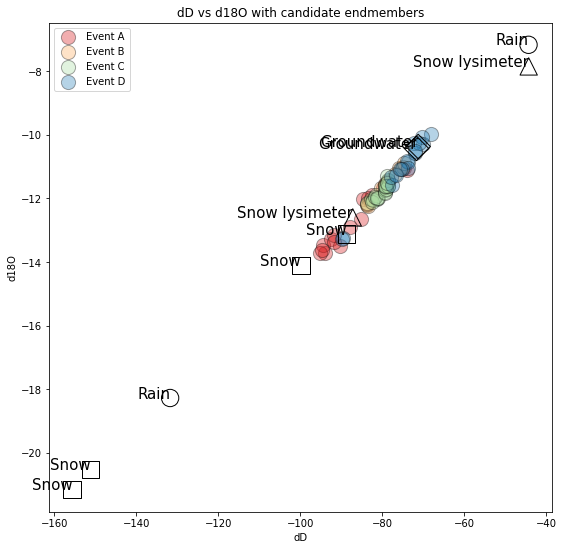

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the streamwater data from the CSV file
streamwater_data = pd.read_csv("data/Data_for_EMMA_2022_HB.csv")

# Convert the "Date" column to datetime
streamwater_data["Date"] = pd.to_datetime(streamwater_data["Date"], format="%m/%d/%y", errors="coerce")

# Load the potential endmembers from the separate CSV file
endmember_data = pd.read_csv("data/end_members_2022_HB.csv")

# Convert the "Date" column to datetime in the endmember data
endmember_data["Date"] = pd.to_datetime(endmember_data["Date"], format="%m/%d/%y")

# Define date ranges and corresponding colors for streamwater data
streamwater_date_ranges = {
    "Event A": ("2022-02-16", "2022-02-23", "#d7191c"),  # Blue
    "Event B": ("2022-03-05", "2022-03-10", "#fdae61"),  # Red
    "Event C": ("2022-03-16", "2022-03-22", "#abdda4"),  # Black
    "Event D": ("2022-04-07", "2022-04-11", "#2b83ba")   # Green
}

# Define markers for endmember types
endmember_markers = {'Rain': 'o', 'Snow': 's', 'Snow lysimeter': '^', 'Groundwater': 'D'}

# Create a scatter plot for 'dD' vs 'd18O' with streamwater data
plt.figure(figsize=(9, 9))

# Create a scatter plot for 'dD' vs 'd18O' with streamwater data
legend_labels = []  # List to store legend labels for streamwater samples
for label, (start_date, end_date, color) in streamwater_date_ranges.items():
    event_data = streamwater_data[streamwater_data["Date"].between(start_date, end_date, inclusive="both")]
    plt.scatter(event_data['dD'], event_data['d18O'], label=label, alpha=0.35, edgecolor='black', c=color, s=200)
    
    legend_labels.append(label)

# Create a scatter plot for 'dD' vs 'd18O' with endmember data
for index, row in endmember_data.iterrows():
    plt.scatter(row['dD'], row['d18O'], label=row['Type'], marker=endmember_markers[row['Type']],
                color='none', edgecolor='black', s=300)
    plt.text(row['dD'], row['d18O'], row['Type'], fontsize=15, ha='right')

plt.xlabel('dD')
plt.ylabel('d18O')
plt.title('dD vs d18O with candidate endmembers')
plt.legend(legend_labels)
plt.show()

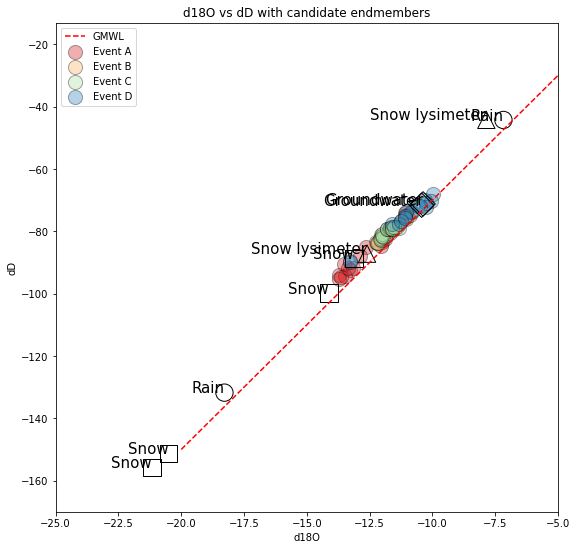

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the streamwater data from the CSV file
streamwater_data = pd.read_csv("data/Data_for_EMMA_2022_HB.csv")

# Convert the "Date" column to datetime
streamwater_data["Date"] = pd.to_datetime(streamwater_data["Date"], format="%m/%d/%y", errors="coerce")

# Load the potential endmembers from the separate CSV file
endmember_data = pd.read_csv("data/end_members_2022_HB.csv")

# Convert the "Date" column to datetime in the endmember data
endmember_data["Date"] = pd.to_datetime(endmember_data["Date"], format="%m/%d/%y")

# Define date ranges and corresponding colors for streamwater data
streamwater_date_ranges = {
    "Event A": ("2022-02-16", "2022-02-23", "#d7191c"),  # Blue
    "Event B": ("2022-03-05", "2022-03-10", "#fdae61"),  # Red
    "Event C": ("2022-03-16", "2022-03-22", "#abdda4"),  # Black
    "Event D": ("2022-04-07", "2022-04-11", "#2b83ba")   # Green
}

# Define markers for endmember types
endmember_markers = {'Rain': 'o', 'Snow': 's', 'Snow lysimeter': '^', 'Groundwater': 'D'}

# Create a scatter plot for 'dD' vs 'd18O' with streamwater data
plt.figure(figsize=(9, 9))

# Create a scatter plot for 'dD' vs 'd18O' with streamwater data
legend_labels = []  # List to store legend labels for streamwater samples
for label, (start_date, end_date, color) in streamwater_date_ranges.items():
    event_data = streamwater_data[streamwater_data["Date"].between(start_date, end_date, inclusive="both")]
    plt.scatter(event_data['d18O'], event_data['dD'], label=label, alpha=0.35, edgecolor='black', c=color, s=200)
    
    legend_labels.append(label)
    
# Plot the GMWL
d18O_values = np.linspace(-20, 5, 100)
dD_values = 8 * d18O_values + 10
plt.plot(d18O_values, dD_values, 'r--', label='GMWL')

# Create a scatter plot for 'dD' vs 'd18O' with endmember data
for index, row in endmember_data.iterrows():
    plt.scatter(row['d18O'], row['dD'], label=row['Type'], marker=endmember_markers[row['Type']],
                color='none', edgecolor='black', s=300)
    plt.text(row['d18O'], row['dD'], row['Type'], fontsize=15, ha='right')
    
plt.xlim([-25, -5])
plt.ylim([-170, -13])

plt.xlabel('d18O')
plt.ylabel('dD')
plt.title('d18O vs dD with candidate endmembers')
plt.legend(['GMWL'] + legend_labels)
plt.show()